In [12]:
import matplotlib.pyplot as plt
import healpy as hp
from pyuvdata import UVBeam
from pyuvdata import UVData
from MoonLSTs import zenithdec, zenithra  #Importing the RA and Dec for HERA zenith
from pylab import meshgrid, cm
import numpy as np
import math as math
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SkyCoord
%matplotlib notebook

In [3]:
hera_beam = UVBeam() #Instantiating HERA's beam as a UVBeam object
hera_beam.read_beamfits("NF_HERA_power_beam_healpix.fits") #Reading in the beam model
nside = hera_beam.nside #Setting the nside variable to be used in plotting

<IPython.core.display.Javascript object>


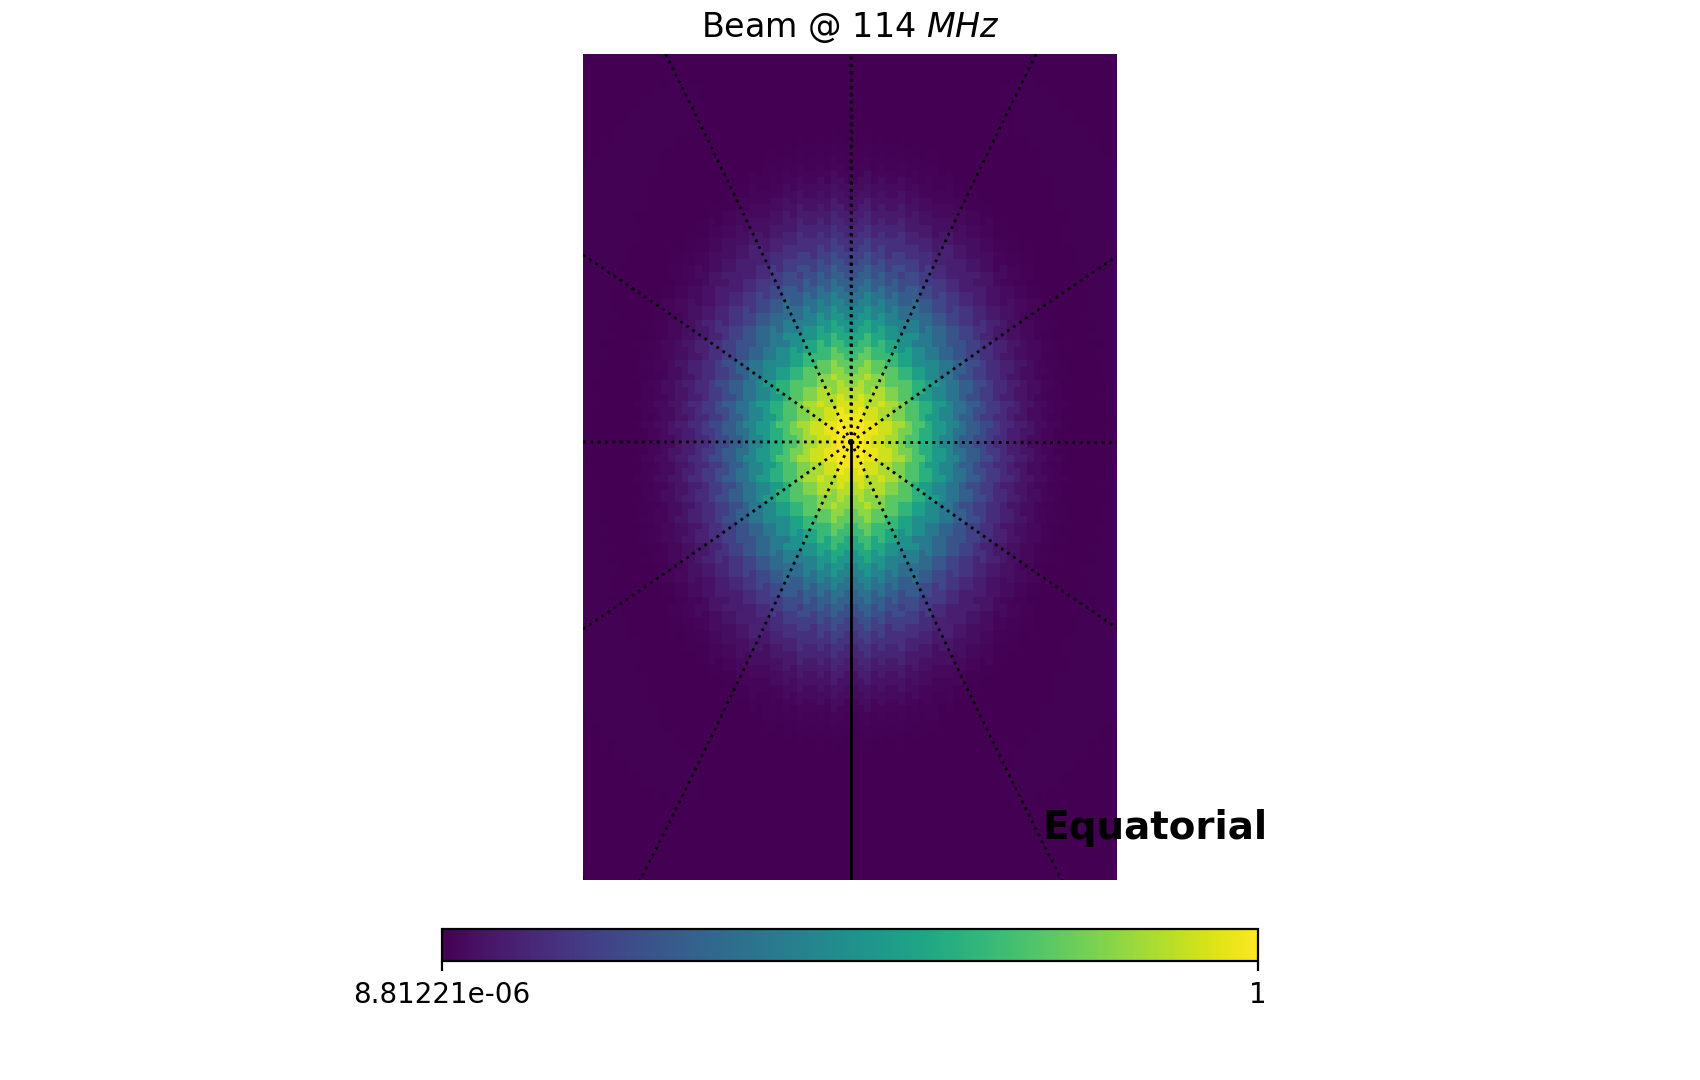

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [18]:
beam_map = hera_beam.data_array[0][0][0][14] #Selecting a specific frequency to observe
beam_map_norm = beam_map/np.max(beam_map)
mapping = hp.mollview(beam_map_norm
                      ,title="Beam @ 114 $MHz$"
                      ,nest=None
                      ,coord="C"
                      ,return_projected_map=True
                      ,rot=[0.0,90.0]) #Best look at beam
                                                
hp.graticule()

<IPython.core.display.Javascript object>


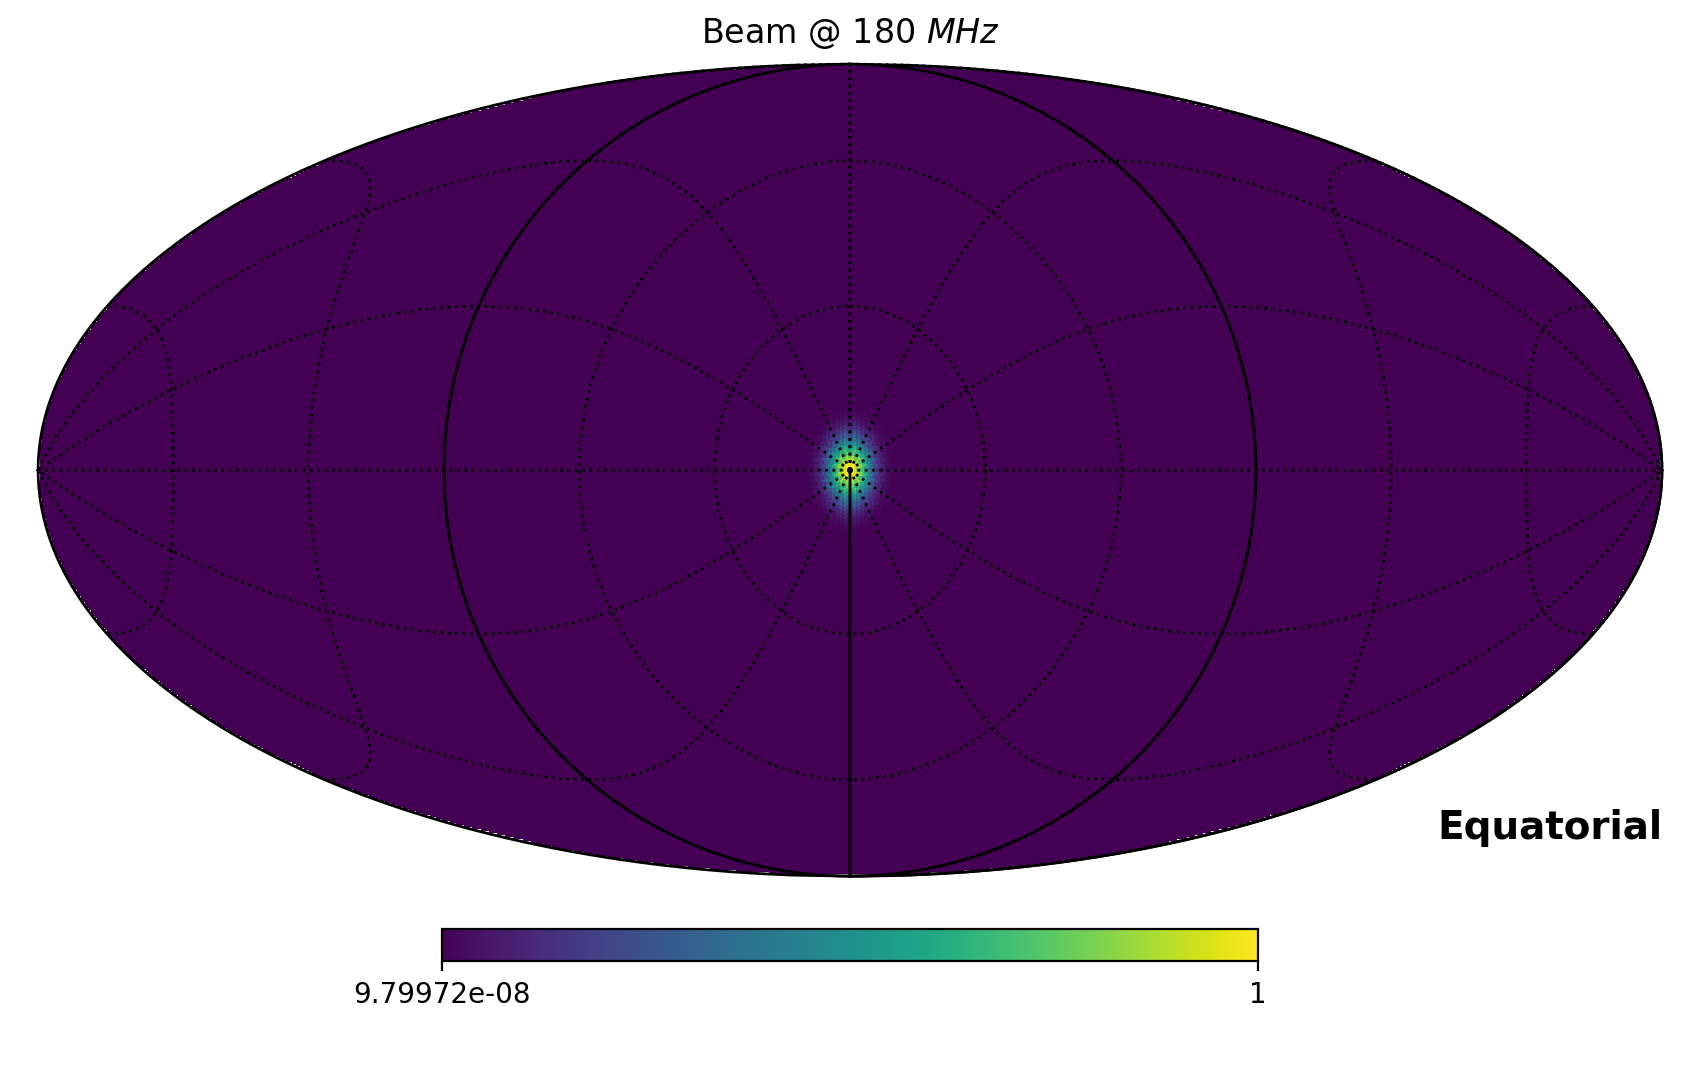

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [5]:
beam_map = hera_beam.data_array[0][0][0][80] #Selecting a specific frequency to observe
beam_map_norm = beam_map/np.max(beam_map)
mapping = hp.mollview(beam_map_norm
                      ,title="Beam @ 180 $MHz$"
                      ,nest=None
                      ,coord="C"
                      ,return_projected_map=True
                      ,rot=[0.0,90.0]) #Best look at beam
                                                
hp.graticule()

In [6]:
#Getting familiar with beam_map
#print beam_map
print len(beam_map), np.max(beam_map), np.min(beam_map), beam_map.shape, type(beam_map)

49152 12516.439491241637 0.001226575516619302 (49152,) <type 'numpy.ndarray'>


In [7]:
print hera_beam.data_array.shape

(1, 1, 2, 101, 49152)


In [8]:
hera_beam._data_array.description

'Depending on beam type, either complex E-field values ("efield" beam type) or power values ("power" beam type) for beam model. units are linear normalized to either peak or solid angle as given by data_normalization. The shape depends on the beam_type and pixel_coordinate_system, if it is "healpix", the shape is: (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Npixels), otherwise it is (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Naxes2, Naxes1)'

<IPython.core.display.Javascript object>


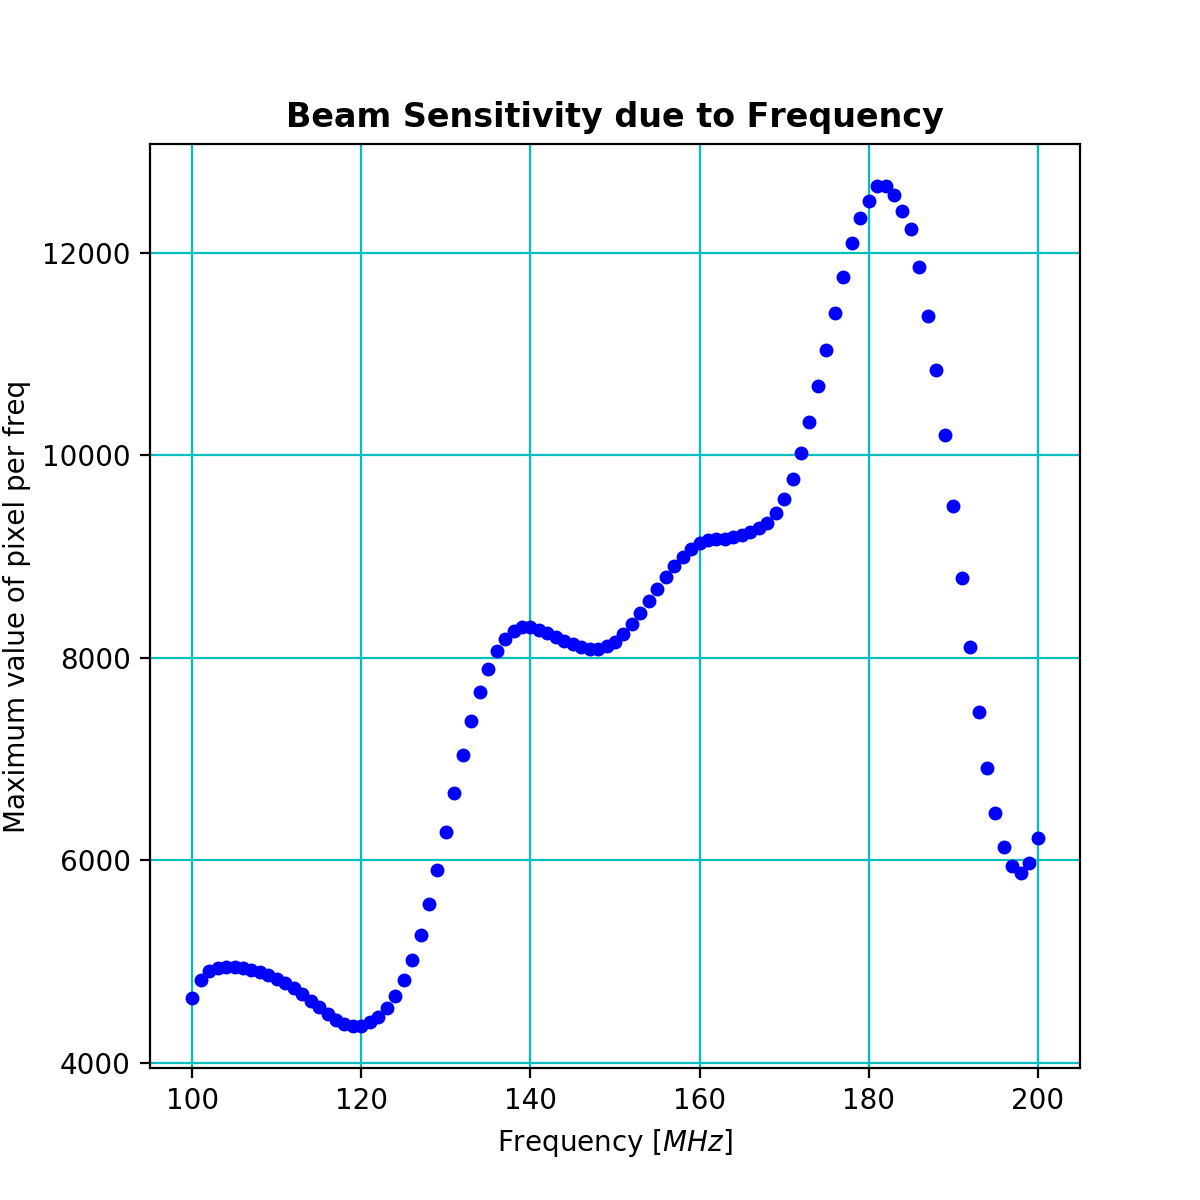

In [9]:
fig1 = plt.figure(figsize=(6.0,6.0))
#Plotting Frequency vs Maximum pixel value for each freq.
for i in range(101):
    plt.plot(i+100,np.max(hera_beam.data_array[0][0][0][i]), "bo", markersize=4.0)
plt.xlabel("Frequency [$MHz$]")
plt.ylabel("Maximum value of pixel per freq")
plt.title("Beam Sensitivity due to Frequency", fontweight="bold")
plt.grid(True, color="c")

In [28]:
zenithra                             #Checking for RA value correctness
zenithra_deg = np.rad2deg(zenithra)  #Converting from radians to degrees
print zenithra_deg

313.3679874878402


In [29]:
zenithdec                              #Checking for Dec value correctness
zenithdec_deg = np.rad2deg(zenithdec)  #Converting from radians to degrees
print zenithdec_deg

-30.72152612068925


In [42]:
def beam_factor_2D(ra, dec, hera_zen_ra, freq):
    """
    Outputs the beam factor of an objects's specified RA and Dec.
    Args:
    'ra'          : Object's Right Ascension in degrees
    'dec'         : Object's Declination in degrees
    'hera_zen_ra' : HERA's Zenith Right Ascension for the specific JDate in degrees
    'freq'        : The frequency we want to analyze (interger)
    """
    hera_ra    = ra                                    #RA as seen by HERA
    hera_dec   = np.abs(dec)                           #Dec as seen by HERA
    rel_dec    = hera_dec - 30.72152612068925          #Finding relative Dec at HERA
    rel_ra     = np.abs(hera_ra - hera_zen_ra)         #Finding relative RA at HERA
    np_dec     = np.sqrt(rel_dec**2 + rel_ra**2)       #Transforming rect RA to polar
    np_ra      = math.atan2(rel_dec,rel_ra)            #Transforming rect Dec to polar
    np_dec     = 90.0 - np.abs(np_dec)                 #Finding corresponding North Pole Dec
    np_ra      = np_ra                                 #Finding corresponding North Pole RA
    
    freq           = freq - 100                           #Changing the freq to array element
    beam_map       = hera_beam.data_array[0][0][0][freq]  #Selecting specified frequency
    beam_map_norm  = beam_map/np.max(beam_map)            #Normalizing values of beam model
    
    #Finding pixel value @ specified coords.
    return hp.get_interp_val(beam_map_norm,np_ra,np_dec, lonlat=True)

In [43]:
beam_factor_2D(zenithra_deg,zenithdec_deg,zenithra_deg,180)

0.9999788557017595

In [44]:
# np.set_printoptions(precision=7)
hera_beam.freq_array

array([[1.00e+08, 1.01e+08, 1.02e+08, 1.03e+08, 1.04e+08, 1.05e+08,
        1.06e+08, 1.07e+08, 1.08e+08, 1.09e+08, 1.10e+08, 1.11e+08,
        1.12e+08, 1.13e+08, 1.14e+08, 1.15e+08, 1.16e+08, 1.17e+08,
        1.18e+08, 1.19e+08, 1.20e+08, 1.21e+08, 1.22e+08, 1.23e+08,
        1.24e+08, 1.25e+08, 1.26e+08, 1.27e+08, 1.28e+08, 1.29e+08,
        1.30e+08, 1.31e+08, 1.32e+08, 1.33e+08, 1.34e+08, 1.35e+08,
        1.36e+08, 1.37e+08, 1.38e+08, 1.39e+08, 1.40e+08, 1.41e+08,
        1.42e+08, 1.43e+08, 1.44e+08, 1.45e+08, 1.46e+08, 1.47e+08,
        1.48e+08, 1.49e+08, 1.50e+08, 1.51e+08, 1.52e+08, 1.53e+08,
        1.54e+08, 1.55e+08, 1.56e+08, 1.57e+08, 1.58e+08, 1.59e+08,
        1.60e+08, 1.61e+08, 1.62e+08, 1.63e+08, 1.64e+08, 1.65e+08,
        1.66e+08, 1.67e+08, 1.68e+08, 1.69e+08, 1.70e+08, 1.71e+08,
        1.72e+08, 1.73e+08, 1.74e+08, 1.75e+08, 1.76e+08, 1.77e+08,
        1.78e+08, 1.79e+08, 1.80e+08, 1.81e+08, 1.82e+08, 1.83e+08,
        1.84e+08, 1.85e+08, 1.86e+08, 1.87e+08, 

<IPython.core.display.Javascript object>


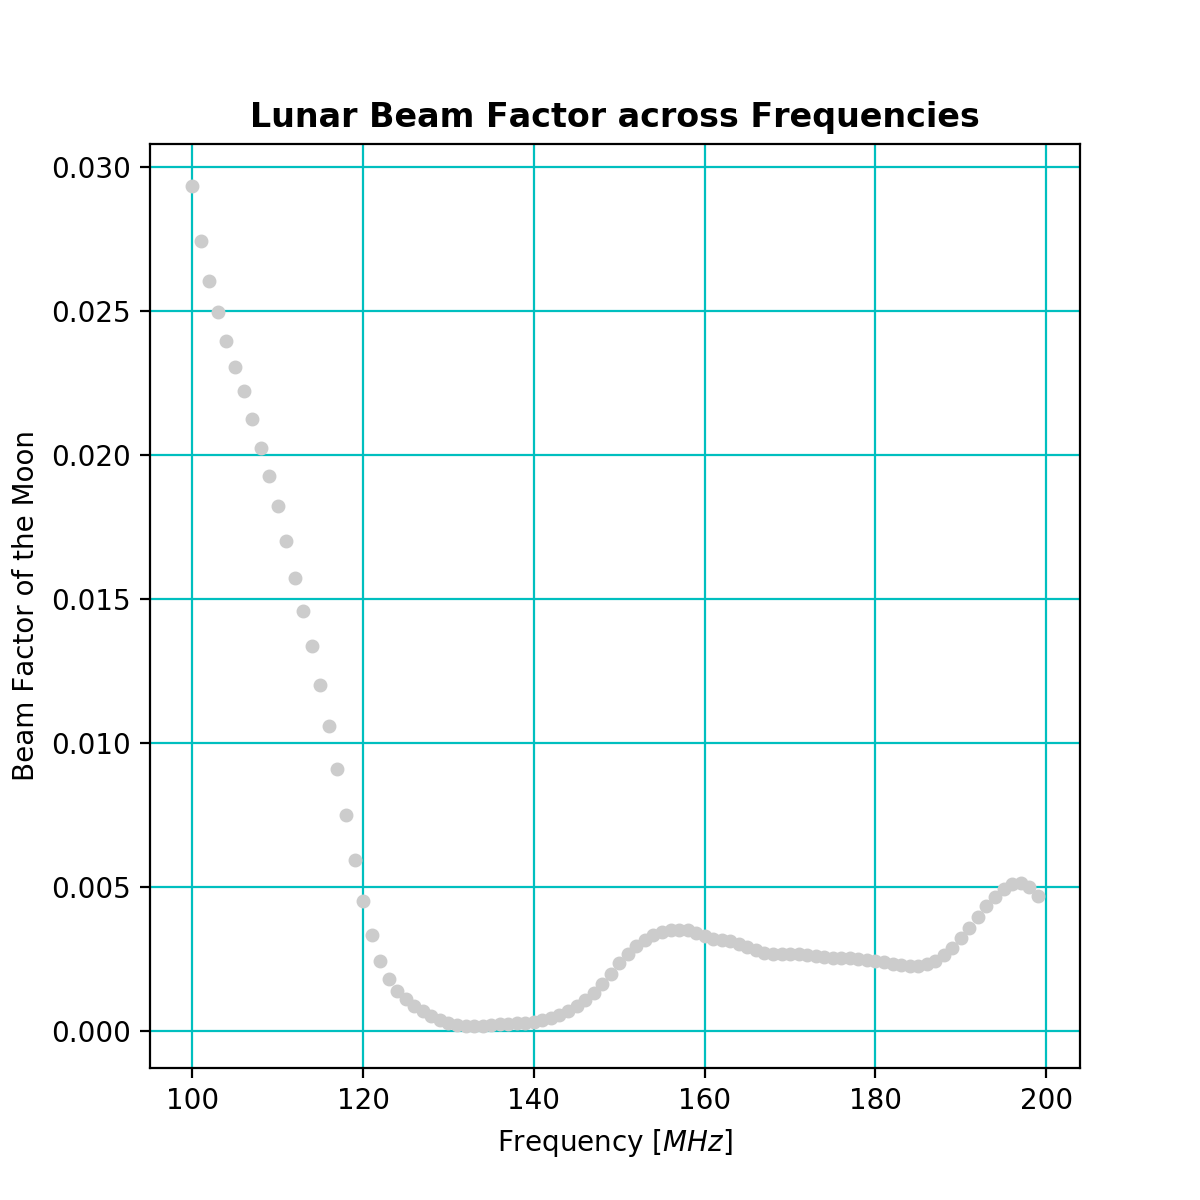

In [45]:
fig2 = plt.figure(figsize=(6.0,6.0))

for freq in range(100,200):
    moon_factor = beam_factor_2D(316.15973309,-15.84410523,zenithra_deg,freq)
    plt.plot(freq, moon_factor, "o", c="#cccccc", markersize=4.0)

plt.xlabel("Frequency [$MHz$]")
plt.ylabel("Beam Factor of the Moon")
plt.title("Lunar Beam Factor across Frequencies", fontweight="bold")
plt.grid(True, color="c")

In [46]:
index        = 0
moon_freqs   = []
src1_factors = []
src2_factors = []
moon_factors = []

source1_ra, source1_dec = 316.833862, -25.436880
source2_ra, source2_dec = 315.418915, -28.055460

for frequency in hera_beam.freq_array[0]:
    if frequency >= 1.09e8 and frequency <= 1.19e8:
        index += 1
        freq_element = frequency/1e6
        freq_element = int(freq_element)
        moon_freqs.append(freq_element)

for lunar_freq in moon_freqs:
#     print lunar_freq
    moon_factor = beam_factor_2D(316.15973309,-15.84410523,zenithra_deg,lunar_freq)
    src1_factor = beam_factor_2D(source1_ra,source1_dec,zenithra_deg,lunar_freq)
    src2_factor = beam_factor_2D(source2_ra,source2_dec,zenithra_deg,lunar_freq)
    moon_factors.append(moon_factor)
    src1_factors.append(src1_factor)
    src2_factors.append(src2_factor)

# print moon_factors
# print src1_factors
# print src2_factors

print index
freq_avg = np.sum(moon_freqs)/index
moon_avg = np.sum(moon_factors)/index
src1_avg = np.sum(src1_factors)/index 
src2_avg = np.sum(src2_factors)/index

print freq_avg
print moon_avg
print src1_avg
print src2_avg

11
114
0.01303087772060717
0.5507734086047712
0.8510920749232209


In [47]:
print np.min(moon_factors), np.max(moon_factors)

0.005923259033200702 0.01925849410827307


<IPython.core.display.Javascript object>


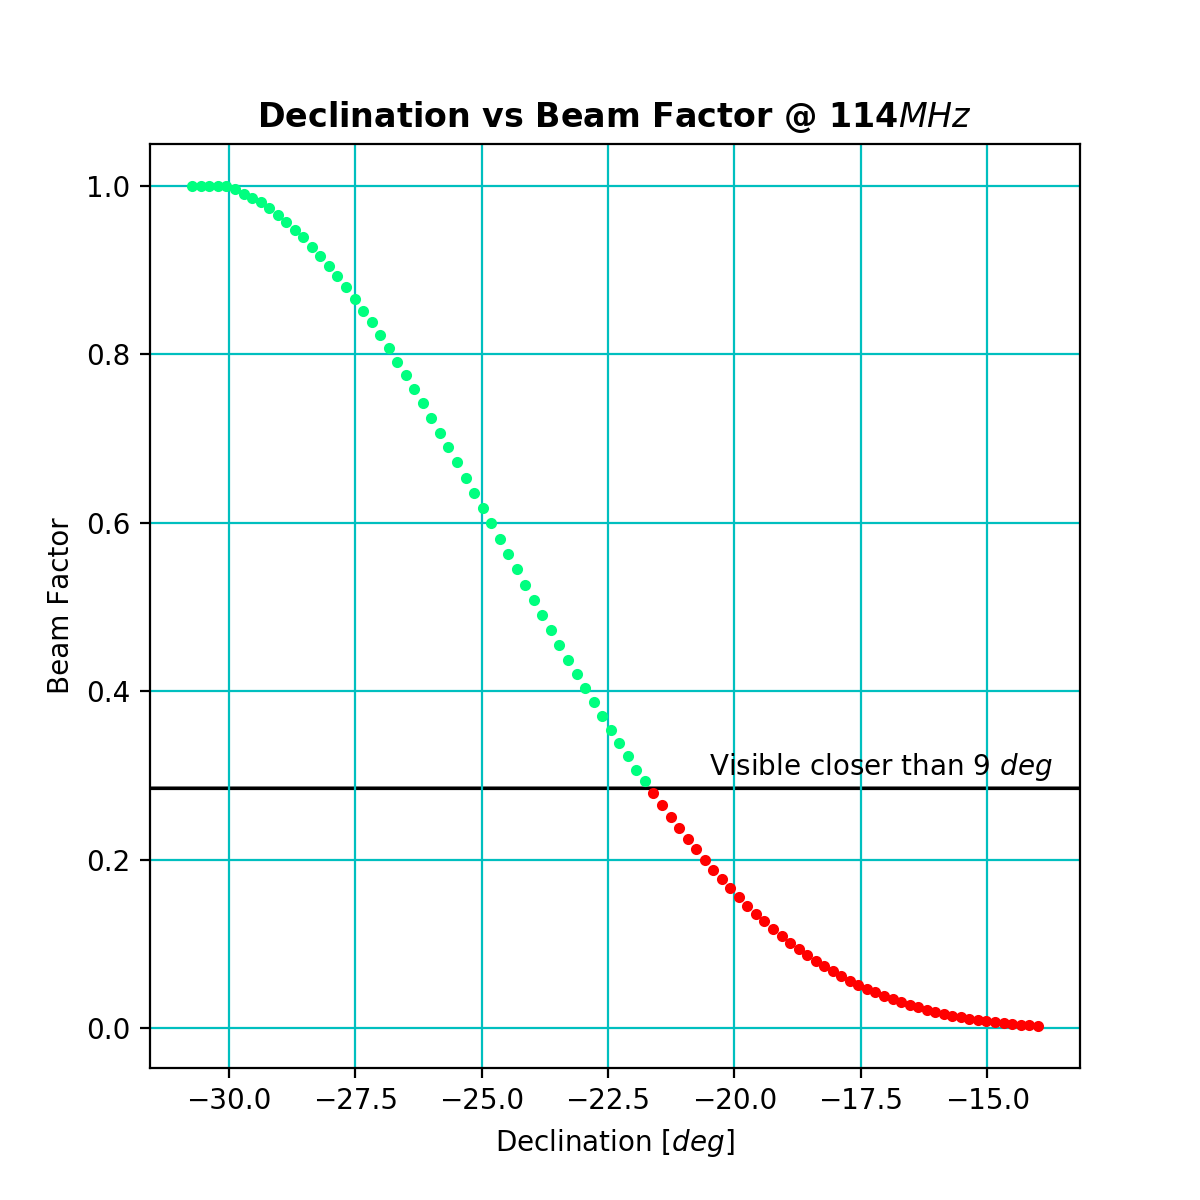

Text(-20.5,0.3,'Visible closer than 9 $deg$')

In [48]:
dec_range = np.linspace(-14,zenithdec_deg,100)
fig3 = plt.figure(figsize=(6.0,6.0))

for dec in dec_range:
    beam_factor = beam_factor_2D(zenithra_deg,dec,zenithra_deg,114)
    if beam_factor >= 0.2847:
        plt.plot(dec,beam_factor, "o", c="#00ff7f", markersize=3.0)
    else:
        plt.plot(dec,beam_factor, "ro", markersize=3.0)

plt.xlabel("Declination [$deg$]")
plt.ylabel("Beam Factor")
plt.title("Declination vs Beam Factor @ 114$MHz$", fontweight="bold")
plt.grid(True, color="c")
plt.arrow(-31.5344,0.2847,18.3541,0) #21.6767
plt.text(-20.5,0.3,"Visible closer than 9 $deg$")

In [27]:
print beam_factor_2D(zenithra_deg+12.5,zenithdec_deg+9.0,zenithra_deg,114)

0.2849491557007068


In [49]:
beam_factor_2D(zenithra_deg+15,zenithdec,zenithra_deg,150)

0.0014346203429210559